In [1]:
from CartPole.agent import Agent
from CartPole.model import Model
from CartPole.training_controller import CartPole_train

from shared.memory_manager import MemoryManager

import torch
import torch.optim as optim

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration

import numpy as np
import matplotlib.pyplot as plt

import os


Loading environment football failed: No module named 'gfootball'


In [2]:
state_dict = None

rewards = []
value_loss = []
loss = []


In [15]:
iterations = 500
devices = ["cpu"] * 8
learning_rate = 1e-7
entropy_weight = 0


In [16]:
state_dict, to_add_rewards, to_add_places, to_add_value_loss, to_add_loss = CartPole_train(state_dict, iterations, learning_rate, entropy_weight, None, devices)
rewards = np.concatenate([rewards, to_add_rewards])
value_loss = np.concatenate([value_loss, to_add_value_loss])
loss = np.concatenate([loss, to_add_loss])

Current Iteration 499/500, 99.80%, Value loss: 20.68

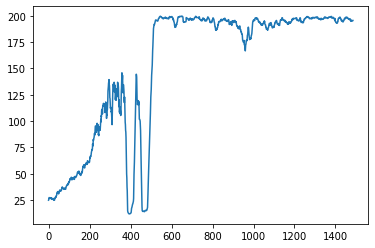

In [17]:
N = len(rewards) // 100
plt.plot(np.convolve(rewards, np.ones(N)/N, mode='valid'))

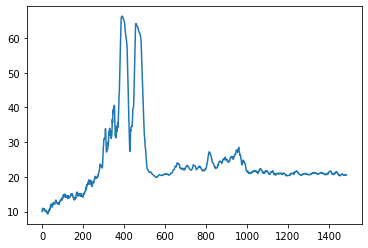

In [18]:
plt.plot(np.convolve(value_loss, np.ones(N)/N, mode='valid'))

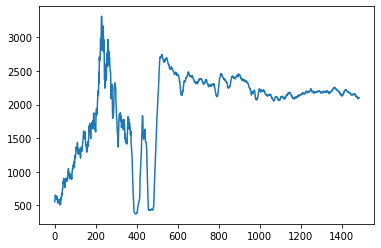

In [19]:
plt.plot(np.convolve(loss, np.ones(N)/N, mode='valid'))

In [20]:
torch.save(state_dict, "A3C/model")

!tar -czvf submission.tar.gz main.py A3C/model A3C/agent.py A3C/model.py shared/map.py


a main.py
a A3C/model
a A3C/agent.py
a A3C/model.py
a shared/map.py
